# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
# Relabel the marital status variable to have character labels
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 
                                       5: "Never married", 6: "Living with partner", 77: "Refused", 99: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTLx.fillna("Missing")

# Relabel the gender variable to have character labels
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

# Construct frequency table for all people
everyone = da.DMDMARTLx.value_counts()
everyone_norm = da.DMDMARTLx.value_counts(normalize=True)

# Construct frequency table for women only
female = da.loc[da["RIAGENDRx"] == "Female"]["DMDMARTLx"].value_counts()
female_norm = da.loc[da["RIAGENDRx"] == "Female"]["DMDMARTLx"].value_counts(normalize=True)

# Construct frequency table for men only
male = da.loc[da["RIAGENDRx"] == "Male"]["DMDMARTLx"].value_counts()
male_norm = da.loc[da["RIAGENDRx"] == "Male"]["DMDMARTLx"].value_counts(normalize=True)

# Construct bin for people whose age is between 30 and 40
da["agegroup"]=pd.cut(da.RIDAGEYR, bins=[31, 40], right=False)

# Construct frequency table for everyone whose age is between 30 and 40
age = da.groupby("agegroup")["DMDMARTLx"].value_counts()
age_norm = da.groupby("agegroup")["DMDMARTLx"].value_counts(normalize=True)

# Construct frequency table for women whose age is between 30 and 40
female30 = da.loc[da["RIAGENDRx"] == "Female"].groupby(["agegroup"])["DMDMARTLx"].value_counts()
female30_norm = da.loc[da["RIAGENDRx"] == "Female"].groupby(["agegroup"])["DMDMARTLx"].value_counts(normalize=True)

# Construct frequency table for men whose age is between 30 and 40
male30 = da.loc[da["RIAGENDRx"] == "Male"].groupby(["agegroup"])["DMDMARTLx"].value_counts()
male30_norm = da.loc[da["RIAGENDRx"] == "Male"].groupby(["agegroup"])["DMDMARTLx"].value_counts(normalize=True)

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [3]:
print("Frequency table for women:")
print(female_norm)
print("")
print("Frequency table for men:")
print(male_norm)

Frequency table for women:
Married                0.437836
Never married          0.174731
Divorced               0.117608
Widowed                0.099462
Living with partner    0.088038
Missing                0.042339
Separated              0.039651
Refused                0.000336
Name: DMDMARTLx, dtype: float64

Frequency table for men:
Married                0.535339
Never married          0.175426
Living with partner    0.096049
Divorced               0.083001
Missing                0.048931
Widowed                0.036245
Separated              0.024647
Refused                0.000362
Name: DMDMARTLx, dtype: float64


__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [4]:
print("Frequency table for everyone:")
print(everyone_norm)
print("")
print("Frequency table for women:")
print(female_norm)

Frequency table for everyone:
Married                0.484743
Never married          0.175065
Divorced               0.100959
Living with partner    0.091892
Widowed                0.069050
Missing                0.045510
Separated              0.032432
Refused                0.000349
Name: DMDMARTLx, dtype: float64

Frequency table for women:
Married                0.437836
Never married          0.174731
Divorced               0.117608
Widowed                0.099462
Living with partner    0.088038
Missing                0.042339
Separated              0.039651
Refused                0.000336
Name: DMDMARTLx, dtype: float64


In [5]:
print("Frequency table for women:")
print(female_norm)
print("")
print("Frequency table for women between the ages of 30 and 40:")
print(female30_norm)

Frequency table for women:
Married                0.437836
Never married          0.174731
Divorced               0.117608
Widowed                0.099462
Living with partner    0.088038
Missing                0.042339
Separated              0.039651
Refused                0.000336
Name: DMDMARTLx, dtype: float64

Frequency table for women between the ages of 30 and 40:
agegroup  DMDMARTLx          
[31, 40)  Married                0.539007
          Never married          0.208038
          Living with partner    0.130024
          Divorced               0.082742
          Separated              0.035461
          Widowed                0.004728
Name: DMDMARTLx, dtype: float64


__Q1c.__ Repeat part b for the men.

In [6]:
print("Frequency table for everyone:")
print(everyone_norm)
print("")
print("Frequency table for men:")
print(male_norm)

Frequency table for everyone:
Married                0.484743
Never married          0.175065
Divorced               0.100959
Living with partner    0.091892
Widowed                0.069050
Missing                0.045510
Separated              0.032432
Refused                0.000349
Name: DMDMARTLx, dtype: float64

Frequency table for men:
Married                0.535339
Never married          0.175426
Living with partner    0.096049
Divorced               0.083001
Missing                0.048931
Widowed                0.036245
Separated              0.024647
Refused                0.000362
Name: DMDMARTLx, dtype: float64


In [7]:
print("Frequency table for men:")
print(male_norm)
print("")
print("Frequency table for men between the ages of 30 and 40:")
print(male30_norm)

Frequency table for men:
Married                0.535339
Never married          0.175426
Living with partner    0.096049
Divorced               0.083001
Missing                0.048931
Widowed                0.036245
Separated              0.024647
Refused                0.000362
Name: DMDMARTLx, dtype: float64

Frequency table for men between the ages of 30 and 40:
agegroup  DMDMARTLx          
[31, 40)  Married                0.562500
          Never married          0.194712
          Living with partner    0.161058
          Divorced               0.048077
          Separated              0.026442
          Widowed                0.004808
          Refused                0.002404
Name: DMDMARTLx, dtype: float64


## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [8]:
# Cut age into bands no wider than 10 years
da["agegrp"] = pd.cut(da.RIDAGEYR, [20, 30, 40, 50, 60, 70, 80])

# Eliminate rare/missing values
df = da.loc[~da.DMDMARTLx.isin(["Don't know", "Missing"]), :]

# Group marital status by age group band and subset the data to include only females
df = df.loc[df["RIAGENDRx"] == "Female"].groupby(["agegrp"])["DMDMARTLx"]

# obtain the counts for marital status within each age group band for females
df = df.value_counts(normalize=True) # Normalize
df = df.unstack() # Restructure results from long to wide
print(df.to_string(float_format="%.3f")) # Limit display to 3 d.p.

DMDMARTLx  Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp                                                                                       
(20, 30]      0.021                0.206    0.305          0.446      NaN      0.021      NaN
(30, 40]      0.091                0.120    0.544          0.205      NaN      0.036    0.004
(40, 50]      0.137                0.074    0.574          0.125      NaN      0.066    0.024
(50, 60]      0.177                0.068    0.547          0.089    0.002      0.057    0.060
(60, 70]      0.193                0.043    0.481          0.086      NaN      0.050    0.147
(70, 80]      0.144                0.007    0.317          0.051      NaN      0.020    0.461


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [9]:
# Eliminate rare/missing values
dm = da.loc[~da.DMDMARTLx.isin(["Don't know", "Missing"]), :]

# Group marital status by age group band and subset the data to include only females
dm = dm.loc[dm["RIAGENDRx"] == "Male"].groupby(["agegrp"])["DMDMARTLx"]

# obtain the counts for marital status within each age group band for males
dm = dm.value_counts(normalize=True) # Normalize
dm = dm.unstack() # Restructure results from long to wide
print(dm.to_string(float_format="%.3f")) # Limit display to 3 d.p.

DMDMARTLx  Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp                                                                                       
(20, 30]      0.005                0.213    0.238          0.523      NaN      0.016    0.005
(30, 40]      0.052                0.157    0.563          0.194    0.002      0.026    0.004
(40, 50]      0.085                0.082    0.703          0.097      NaN      0.027    0.005
(50, 60]      0.126                0.075    0.652          0.104      NaN      0.022    0.022
(60, 70]      0.126                0.050    0.666          0.087      NaN      0.032    0.039
(70, 80]      0.142                0.022    0.612          0.022      NaN      0.035    0.167


In [10]:
print("Female:")
print(df.to_string(float_format="%.3f"))
print("")
print("Male:")
print(dm.to_string(float_format="%.3f"))
print("")

Female:
DMDMARTLx  Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp                                                                                       
(20, 30]      0.021                0.206    0.305          0.446      NaN      0.021      NaN
(30, 40]      0.091                0.120    0.544          0.205      NaN      0.036    0.004
(40, 50]      0.137                0.074    0.574          0.125      NaN      0.066    0.024
(50, 60]      0.177                0.068    0.547          0.089    0.002      0.057    0.060
(60, 70]      0.193                0.043    0.481          0.086      NaN      0.050    0.147
(70, 80]      0.144                0.007    0.317          0.051      NaN      0.020    0.461

Male:
DMDMARTLx  Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp                                                                                       
(20, 30]      0.005                0.213    0

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

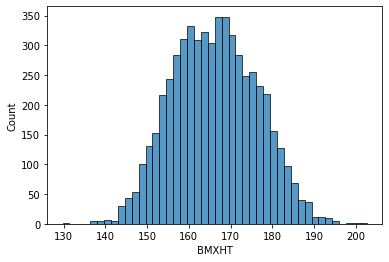

In [11]:
sns.histplot(da.BMXHT.dropna())

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

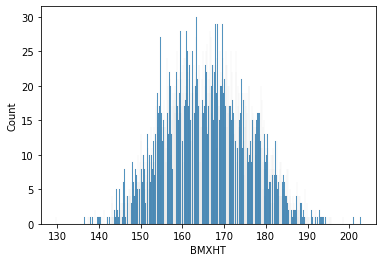

In [12]:
sns.histplot(da.BMXHT.dropna(), bins=1000)

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

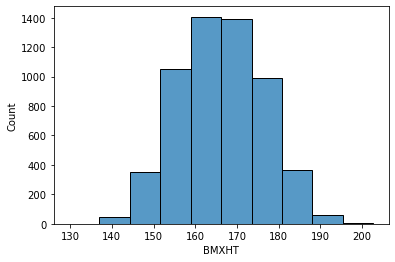

In [13]:
sns.histplot(da.BMXHT.dropna(), bins=10)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

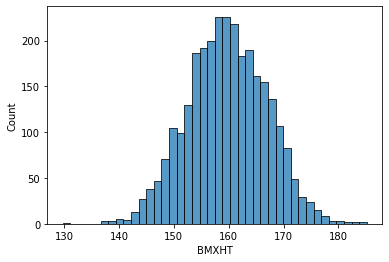

In [14]:
# Histogram for heights of women
female_height = da.loc[da.RIAGENDRx.isin(["Female"]), :]
sns.histplot(female_height.BMXHT.dropna())

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

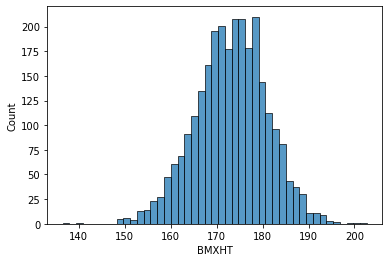

In [15]:
# Histogram for heights of men
male_height = da.loc[da.RIAGENDRx.isin(["Male"]), :]
sns.histplot(male_height.BMXHT.dropna())

<AxesSubplot:xlabel='RIAGENDRx', ylabel='BMXHT'>

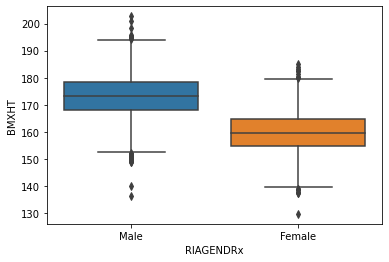

In [16]:
# Boxplot for heights of men and women
sns.boxplot(x="RIAGENDRx", y="BMXHT", data=da)

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

<AxesSubplot:>

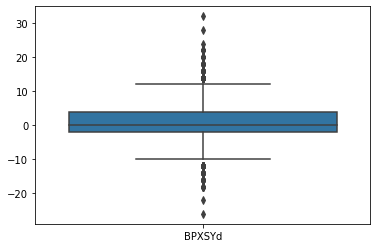

In [17]:
da["BPXSYd"] = da.BPXSY1 - da.BPXSY2
sns.boxplot(data=da.loc[:, ["BPXSYd"]])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [18]:
da.BPXSYd.dropna().describe()

count    5369.000000
mean        0.674986
std         5.046465
min       -26.000000
25%        -2.000000
50%         0.000000
75%         4.000000
max        32.000000
Name: BPXSYd, dtype: float64

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

<AxesSubplot:>

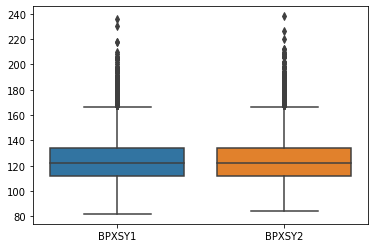

In [19]:
sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [20]:
# Recode educational attainment category
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "A:<9", 2: "B:9-11", 3: "C:HS/GED", 4: "D:Some college/AA", 5: "E:College", 
                                       7: "F:Refused", 9: "G:Don't know"})

# Obtain counts for each level of household
hhsiz = da.groupby(["DMDEDUC2x"])["DMDHHSIZ"].value_counts(normalize=True)

# Restructure the results from long to wide
hhsiz = hhsiz.unstack()

#Print the results and format to 3 d.p.
print(hhsiz.to_string(float_format="%.3f"))

DMDHHSIZ              1     2     3     4     5     6     7
DMDEDUC2x                                                  
A:<9              0.110 0.224 0.147 0.133 0.148 0.108 0.130
B:9-11            0.117 0.222 0.163 0.152 0.146 0.114 0.086
C:HS/GED          0.153 0.271 0.171 0.162 0.110 0.066 0.068
D:Some college/AA 0.151 0.269 0.193 0.169 0.122 0.051 0.045
E:College         0.143 0.348 0.194 0.165 0.095 0.029 0.026
G:Don't know        NaN 0.667   NaN   NaN 0.333   NaN   NaN


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [21]:
# Obtain counts for each level of household restricted to people between 30 and 40 years of age
hhsiz30 = da.groupby(["agegroup","RIAGENDRx","DMDEDUC2x"])["DMDHHSIZ"].describe()

print(hhsiz30["50%"])

agegroup  RIAGENDRx  DMDEDUC2x        
[31, 40)  Female     A:<9                 5.0
                     B:9-11               5.0
                     C:HS/GED             5.0
                     D:Some college/AA    4.0
                     E:College            4.0
          Male       A:<9                 5.0
                     B:9-11               5.0
                     C:HS/GED             4.0
                     D:Some college/AA    4.0
                     E:College            3.0
Name: 50%, dtype: float64


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [56]:
# Create new dataframes for Males and Females
dam = da.where(da.RIAGENDRx == "Male")
daf = da.where(da.RIAGENDRx == "Female")

print("Age Ratios:")

# Get mean and ratio between largest and smallest mean for age across every combo of SDMVSTRA and SDMVPSU for males
magemean = dam.groupby(['SDMVSTRA','SDMVPSU'])["RIDAGEYR"].mean()
mageratio = magemean.max() / magemean.min()
print("Male:", mageratio)

# Get mean and ratio between largest and smallest mean for age across every combo of SDMVSTRA and SDMVPSU for females
fagemean = daf.groupby(['SDMVSTRA','SDMVPSU'])["RIDAGEYR"].mean()
fageratio = fagemean.max() / fagemean.min()
print("Female:", fageratio)

print("")
print("Height Ratios:")

# Get mean and ratio between largest and smallest mean for height across every combo of SDMVSTRA and SDMVPSU for males
mhtmean = dam.groupby(['SDMVSTRA','SDMVPSU'])["BMXHT"].mean()
mhtratio = mhtmean.max() / mhtmean.min()
print("Male:", mhtratio)

# Get mean and ratio between largest and smallest mean for height across every combo of SDMVSTRA and SDMVPSU for females
fhtmean = daf.groupby(['SDMVSTRA','SDMVPSU'])["BMXHT"].mean()
fhtratio = fhtmean.max() / fhtmean.min()
print("Female:", fhtratio)

print("")
print("BMI Ratios:")

# Get mean and ratio between largest and smallest mean for BMI across every combo of SDMVSTRA and SDMVPSU for males
mbmimean = dam.groupby(['SDMVSTRA','SDMVPSU'])["BMXBMI"].mean()
mbmiratio = mbmimean.max() / mbmimean.min()
print("Male:", mbmiratio)

# Get mean and ratio between largest and smallest mean for BMI across every combo of SDMVSTRA and SDMVPSU for females
fbmimean = daf.groupby(['SDMVSTRA','SDMVPSU'])["BMXBMI"].mean()
fbmiratio = fbmimean.max() / fbmimean.min()
print("Female:", fbmiratio)


Age Ratios:
Male: 1.3114871069416525
Female: 1.3078580577111432

Height Ratios:
Male: 1.0451744119496285
Female: 1.0479496940406412

BMI Ratios:
Male: 1.2332369443245583
Female: 1.2460491548963397


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [70]:
print("Age IQR:")

# Get IQR and ratio between largest and smallest IQR for age across every combo of SDMVSTRA and SDMVPSU for males
mage75 = dam.groupby(['SDMVSTRA','SDMVPSU'])["RIDAGEYR"].quantile(0.75)
mage25 = dam.groupby(['SDMVSTRA','SDMVPSU'])["RIDAGEYR"].quantile(0.25)
mageiqr = mage75 - mage25
mageiqrratio = mageiqr.max() / mageiqr.min()
print("Male:", mageiqrratio)

# Get IQR and ratio between largest and smallest IQR for age across every combo of SDMVSTRA and SDMVPSU for females
fage75 = daf.groupby(['SDMVSTRA','SDMVPSU'])["RIDAGEYR"].quantile(0.75)
fage25 = daf.groupby(['SDMVSTRA','SDMVPSU'])["RIDAGEYR"].quantile(0.25)
fageiqr = fage75 - fage25
fageiqrratio = fageiqr.max() / fageiqr.min()
print("Female:", fageiqrratio)

print("")
print("Height IQR:")

# Get IQR and ratio between largest and smallest IQR for height across every combo of SDMVSTRA and SDMVPSU for males
mht75 = dam.groupby(['SDMVSTRA','SDMVPSU'])["BMXHT"].quantile(0.75)
mht25 = dam.groupby(['SDMVSTRA','SDMVPSU'])["BMXHT"].quantile(0.25)
mhtiqr = mht75 - mht25
mhtiqrratio = mhtiqr.max() / mhtiqr.min()
print("Male:", mhtiqrratio)

# Get IQR and ratio between largest and smallest IQR for height across every combo of SDMVSTRA and SDMVPSU for females
fht75 = daf.groupby(['SDMVSTRA','SDMVPSU'])["BMXHT"].quantile(0.75)
fht25 = daf.groupby(['SDMVSTRA','SDMVPSU'])["BMXHT"].quantile(0.25)
fhtiqr = fht75 - fht25
fhtiqrratio = fhtiqr.max() / fhtiqr.min()
print("Female:", fhtiqrratio)

print("")
print("BMI IQR:")

# Get IQR and ratio between largest and smallest IQR for BMI across every combo of SDMVSTRA and SDMVPSU for males
mbmiiqr = dam.groupby(['SDMVSTRA','SDMVPSU'])["BMXBMI"].quantile(0.75)
mbmiiqr = dam.groupby(['SDMVSTRA','SDMVPSU'])["BMXBMI"].quantile(0.25)
mbmiiqrratio = mbmiiqr.max() / mbmiiqr.min()
print("Male:", mbmiiqrratio)

# Get IQR and ratio between largest and smallest IQR for BMI across every combo of SDMVSTRA and SDMVPSU for females
fbmiiqr = daf.groupby(['SDMVSTRA','SDMVPSU'])["BMXBMI"].quantile(0.75)
fbmiiqr = daf.groupby(['SDMVSTRA','SDMVPSU'])["BMXBMI"].quantile(0.25)
fbmiiqrratio = fbmiiqr.max() / fbmiiqr.min()
print("Female:", fbmiiqrratio)

Age IQR:
Male: 1.8313253012048192
Female: 1.625

Height IQR:
Male: 1.5870967741935498
Female: 1.5874587458745906

BMI IQR:
Male: 1.2399553571428572
Female: 1.308139534883721


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.